In [76]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d 

In [77]:
iris = datasets.load_iris()

In [78]:
data = iris.data
target = iris.target

Problem 2: Implement thuật toán PCA bằng numpy

In [79]:
class pca:
    def __init__(self, data, target):
        self.x = self.standardize(data).T
        self.t = target
        self.S = self.covariance()
        self.eig_val, self.eig_vec = np.linalg.eig(self.S)
        self.var_explained = []
        for i in self.eig_val:
            self.var_explained.append(i/sum(self.eig_val) * 100)
        self.c_sum = np.cumsum(self.var_explained)
        
    
    def standardize(self, data):
        rows, columns =  data.shape
        temp = np.zeros(data.shape)
        for i in range(columns):
            mu = np.mean(data[:, i])
            std = np.std(data[:, i])
            temp[:, i] = (data[:, i] - mu) 
        return temp
    
    def covariance(self):
        return self.x.dot(self.x.T)/(self.x.shape[1] - 1)

    def transform(self, n_component):
        sort_eigval = self.eig_val.argsort()[::-1]
        rank = range(len(sort_eigval))
        res = {sort_eigval[i]:i for i in rank}
        to_take = [res[i] for i in range(n_component)]
        projection_matrix = self.eig_vec[:, to_take]
        return self.x.T.dot(projection_matrix)
            
    def plot_explained_var(self):
        fig, ax = plt.subplots()
        x = [i for i in range(1, len(self.x) + 1)]
        ax.bar(x, self.var_explained, label = 'Individual explained variance')
        ax.step(x, self.c_sum, label = 'Cumulative explained variance')
        ax.legend()


Problem 3: Dùng thuật toán ở bài 2, giảm dữ liệu iris về 2 chiều

In [80]:
def plot1d(x_ax, ax):
    ax.scatter(x = x_ax, y = np.zeros(shape = x_ax.shape), c = target)
    
def plot2d(X, ax):
    y = iris.target
    scatter = ax.scatter(x = X[:, 0], y = X[:, 1], c = y)
    ax.legend(*scatter.legend_elements())


a) Visualize dữ liệu giảm chiều với scatter plot và label của hoa

In [81]:
solution = pca(data, target)

In [82]:
solution.transform(2)

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

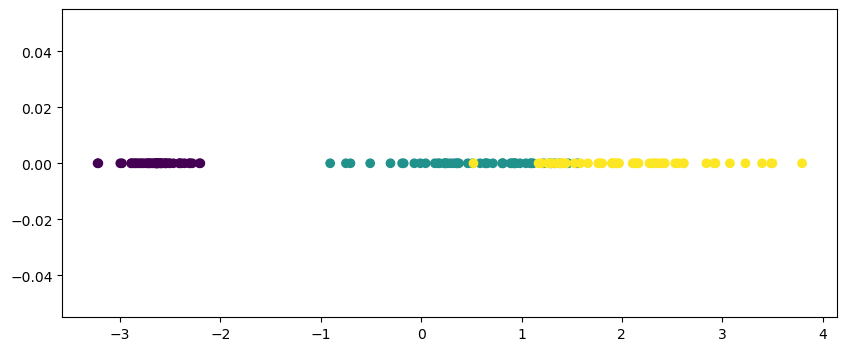

In [83]:
fig, ax = plt.subplots(figsize = (10, 4))
plot1d(solution.transform(1), ax)

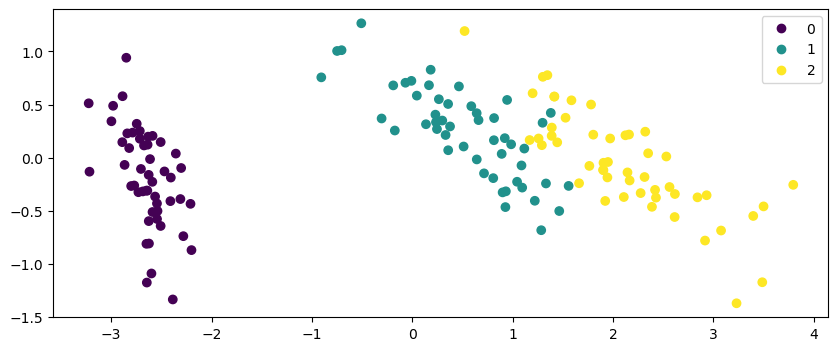

In [84]:
fig, ax = plt.subplots(figsize = (10, 4))
plot2d(solution.transform(2), ax)

b) Vẽ explained variance graph với các chiều của dữ liệu

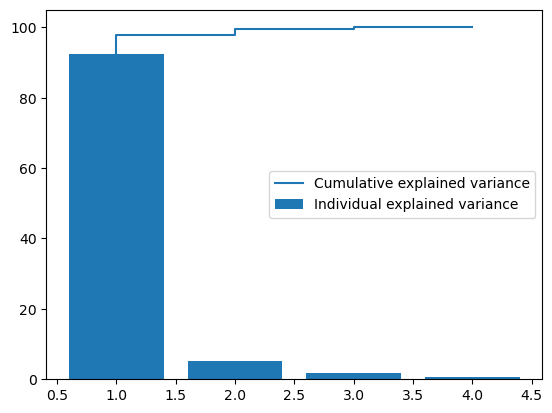

In [85]:
solution.plot_explained_var()

4. Thử dùng bài 3 với thuật toán PCA trong sklearn, so sánh kết quả

In [86]:
from sklearn import decomposition

Text(0.5, 1.0, 'Numpy')

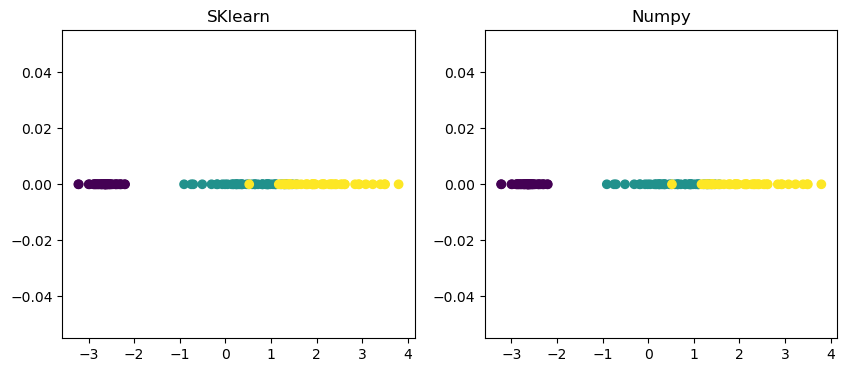

In [87]:
pca1 = decomposition.PCA(n_components=1)
pca1.fit(data)
X = pca1.transform(data)

fig, (ax, ax1) = plt.subplots(ncols = 2, figsize = (10, 4))
plot1d(X, ax)
plot1d(solution.transform(1), ax1)
ax.set_title("SKlearn")
ax1.set_title("Numpy")

Text(0.5, 1.0, 'Numpy')

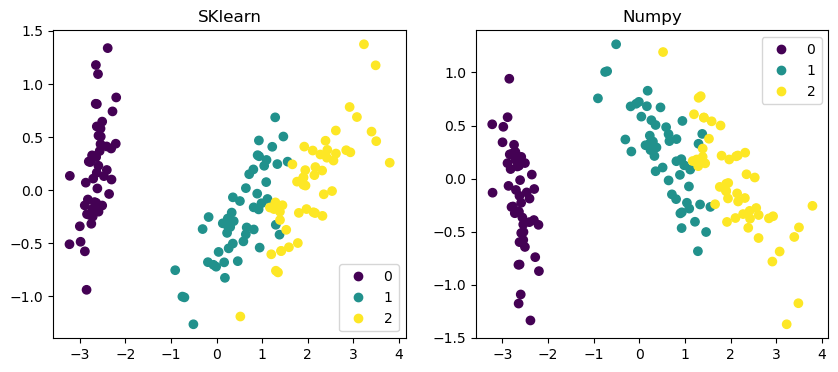

In [88]:

pca2 = decomposition.PCA(n_components=2)
pca2.fit(data)
X = pca2.transform(data)

fig, (ax, ax1) = plt.subplots(ncols = 2, figsize = (10, 4))
plot2d(X, ax)
plot2d(solution.transform(2), ax1)
ax.set_title("SKlearn")
ax1.set_title("Numpy")

In [89]:
X # sklearn solution

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [90]:
solution.transform(2) # numpy implementation

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

#### The difference is in the second feature's sign. The reason is the different sign in the eigenvectors and the SKlearn's is displayed row-wise. However changing the sign does not change the variance contained in the component

In [91]:
pca2.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [92]:
solution.eig_vec

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])